# CS331 - Spring 2022 - Phase 1 [10%]

*__Submission Guidelines:__*
- Naming convention for submission of this notebook is `groupXX_phase1.ipynb` where XX needs to be replaced by your group number. For example: group 1 would rename their notebook to `group01_phase1.ipynb`
- Only the group lead is supposed to make the submission
- All the cells <b>must</b> be run once before submission. If your submission's cells are not showing the results (plots etc.), marks wil be deducted
- Only the code written within this notebook will be considered while grading. No other files will be entertained
- You are advised to follow good programming practies including approriate variable naming and making use of logical comments 

Please note that your notebooks will be checked against submissions from last year's course offering for plagiarism. The university honor code should be maintained. Any violation, if found, will result in disciplinary action.


#### <b>Introduction</b> 
This is the first of the three phases of this offering's project. To give an overview of this phase, we will essentially be building everything from scratch. The datasets that we will be using for this project are the MNIST and the Fashion_MNIST dataset. <b> This notebook will focus on the Fashion_MNIST dataset. </b> 

The Fashion_MNIST dataset consists of 70,000 images of fashion/clothing items belonging to 10 different categories/classes. It has further been divided into 60,000 training images and 10,000 test images and each image is a 28*28 grayscale image (hence 1 color channel). It is recommended that you go through [this link](https://www.kaggle.com/zalando-research/fashionmnist) to familiarize yourself with the dataset.

You will begin by manually loading both the dataset in this notebook (more instructions on this will follow) followed by from-scratch implementation of a Neural Netowrk (NN). Once done, you will have to tweak the hyperparameters (such as learning rate, number of epochs etc.) to get the best results for your NN's implementation

###### <b>You will strictly be using for-loops fort this phase's implementation of NN (unless specified otherwise in the sub-section)

###### Modification of the provided code without prior discussion with the TAs will result in a grade deduction</b>

---

###### <b>Side note</b>
The `plot_model` method will only work if you have the `pydot` python package installed along with [Graphviz](https://graphviz.gitlab.io/download/). If you do not wish to use this then simply comment out the import for `pydot`

###### <b>Need Help?</b>
If you need help, please refer to the course staff ASAP and do not wait till the last moment as they might not be available on very short notice close to deadlines

#### <b>Before You Begin</b>

Skeleton code is provided to get you started. The main methods that you need to implement correspond to the four steps of the training process of a NN which are as follows:
1. Initialize variables and initialize weights
2. Forward pass
3. Backward pass AKA Backpropagation
4. Weight Update AKA Gradient Descent

__Look for comments in the code to see where you are supposed to write your code__ 

A `fit` function is what combines the previous three functions and overall trains the network to __fit__ to the provided training examples. The provided `fit` methods requires all the four steps of the training process to be working correctly. The function has been setup in a way that it expects the above four methods to take particular inputs and return particular outputs. __You are supposed to work within this restriction__ 



__To see if your model is working correctly, you need to make sure that your model loss is going down during training__


Important Comment:
# We are using a lower number of epoch which is 25 as that is giving us a higher test accuracy of approximately 77.81% and also increasing the number of epoch increases the risk of overfitting. Hence our model uses lower number of epoch

In [137]:
# making all the necessary imports here

import numpy as np
import pandas as pd
import time
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn')
from IPython.display import Image
import pydot
from tqdm import tqdm_notebook
import seaborn as sns
from keras.datasets import fashion_mnist
from sklearn.model_selection import train_test_split
from keras.utils import np_utils
from sklearn.datasets import make_moons
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
from google.colab import drive
import glob
import cv2
from numba import jit

In [138]:
# This function will be used to plot the confusion matrix at the end of this notebook

def plot_confusion_matrix(conf_mat):
    classes = ['T-shirt/top','Trouser/pants','Pullover shirt','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot']
    df_cm = pd.DataFrame(conf_mat,classes,classes)
    plt.figure(figsize=(15,9))
    sns.set(font_scale=1.4)
    sns.heatmap(df_cm, annot=True,annot_kws={"size": 16})
    plt.show()

class_labels = ['T-shirt/top','Trouser/pants','Pullover shirt','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle Boot']

In [139]:
# Enter group lead's roll number here. This will be used for plotting purposes

rollnumber = 24100043

#### __Read dataset__

Get paths for all the training and test images in the dataset and print the length of training and test paths' list. For this purpose you can use glob. You can have a look [here](https://www.geeksforgeeks.org/how-to-use-glob-function-to-find-files-recursively-in-python/) on how to use glob. The dataset that has been provided to you guys is a truncated version of the Fashion MNIST dataset (having 2000 training images and 1600 test images, only)

In [140]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [141]:
# Edit this address so that it points to the dataset's zipped file on your Google Drive
!unzip -o -q "/content/drive/MyDrive/Fashion MNIST/dataset.zip" -d "/content/drive/MyDrive/Fashion MNIST/dataset"

In [142]:
import os
for dirpath, dirnames, filenames in os.walk("/content/drive/MyDrive/Fashion MNIST/dataset"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} files in {dirpath}")

There are 2 directories and 0 files in /content/drive/MyDrive/Fashion MNIST/dataset
There are 10 directories and 0 files in /content/drive/MyDrive/Fashion MNIST/dataset/train
There are 0 directories and 200 files in /content/drive/MyDrive/Fashion MNIST/dataset/train/top
There are 0 directories and 200 files in /content/drive/MyDrive/Fashion MNIST/dataset/train/shirt
There are 0 directories and 200 files in /content/drive/MyDrive/Fashion MNIST/dataset/train/dress
There are 0 directories and 200 files in /content/drive/MyDrive/Fashion MNIST/dataset/train/sneaker
There are 0 directories and 200 files in /content/drive/MyDrive/Fashion MNIST/dataset/train/pants
There are 0 directories and 200 files in /content/drive/MyDrive/Fashion MNIST/dataset/train/pullovershirt
There are 0 directories and 200 files in /content/drive/MyDrive/Fashion MNIST/dataset/train/anklefoot
There are 0 directories and 200 files in /content/drive/MyDrive/Fashion MNIST/dataset/train/sandal
There are 0 directories and 

In [143]:
train_paths = glob.glob("/content/drive/MyDrive/Fashion MNIST/dataset/train/**/*.png", recursive=True)
test_paths = glob.glob("/content/drive/MyDrive/Fashion MNIST/dataset/test/**/*.png", recursive=True)
print(f"There are {len(train_paths)} training images and {len(test_paths)} test images.")

There are 2000 training images and 1600 test images.


In [144]:
# Shuffle the training and testing images
np.random.shuffle(train_paths)
np.random.shuffle(test_paths)

def get_label(filepath):
  text_label = filepath.split('/')[-2]
  oh_vector = np.zeros(10)

  label_ind = true_classes.index(text_label)
  oh_vector[label_ind] = 1
  return oh_vector

In [145]:
def get_data(filepaths):
  res = []
  for i,path in enumerate(filepaths):
    if i%200 == 0:
      print(f"Done loading {i} images")
    img = plt.imread(path)
    res.append(img)
  return res



In [146]:
# declaring true classes
true_classes = ["top", "shirt", "dress", "sneaker", "pants", "pullovershirt", "anklefoot", "sandal", "coat", "bag"]

In [147]:
def get_labels(filepaths):
  res = []

  for i, path in enumerate(filepaths):
    text_label = path.split('/')[-2]
    oh_vector = np.zeros(10)

    label_ind = true_classes.index(text_label)
    oh_vector[label_ind] = 1
    res.append(oh_vector)
    if i % 200 == 0:
      print(f"Done loading {i} labels")

  return res

In [148]:
x_train = get_data(train_paths)

Done loading 0 images
Done loading 200 images
Done loading 400 images
Done loading 600 images
Done loading 800 images
Done loading 1000 images
Done loading 1200 images
Done loading 1400 images
Done loading 1600 images
Done loading 1800 images


In [149]:
y_train = get_labels(train_paths)

Done loading 0 labels
Done loading 200 labels
Done loading 400 labels
Done loading 600 labels
Done loading 800 labels
Done loading 1000 labels
Done loading 1200 labels
Done loading 1400 labels
Done loading 1600 labels
Done loading 1800 labels


In [150]:
x_test = get_data(test_paths)

Done loading 0 images
Done loading 200 images
Done loading 400 images
Done loading 600 images
Done loading 800 images
Done loading 1000 images
Done loading 1200 images
Done loading 1400 images


In [151]:
y_test = get_labels(test_paths)

Done loading 0 labels
Done loading 200 labels
Done loading 400 labels
Done loading 600 labels
Done loading 800 labels
Done loading 1000 labels
Done loading 1200 labels
Done loading 1400 labels


In [152]:
classes = 10  # do not change this
x_train = np.array(x_train)  # you must store the training images in this variable 
y_train = np.array(y_train)  # you must store the training images' labels in this variable
x_test = np.array(x_test)   # you must store the test images in this variable
y_test = np.array(y_test)   # you must store the test images' labels in this variable

###### Code Here ######
'''Please note that you will have to extract and one-hot encode the labels of the images for both y_train and y_test'''



print("Number of training sample: ", len(x_train))  # You can change len(X_train) based on your implementation such that total number of training samples is printed
print("Number of testing sample: ", len(x_test))    # You can change len(X_test) based on your implementation such that total number of test samples is printed


Number of training sample:  2000
Number of testing sample:  1600


In [153]:

@jit
def my_matmul(a,b):
  row_a=a.shape[0]
  row_b=b.shape[0]
  col_b=b.shape[1]
  prod= np.zeros((row_a, col_b))
  for i in range(row_a): #rows of a

    for j in range(col_b): #col of b
      for k in range(row_b): #row of b
        prod[i][j]+= a[i][k]*b[k][j]
  return prod

#### __NN Implementation__
Your implementation of NN needs to use the `sigmoid` activation function for the hidden layer(s) and the `softmax` activation function for the output layer. The NN model you will be creating here will consits of only three layers: 1 input layer, 1 hidden layer and 1 output layer

In [154]:
class NeuralNetwork():
    
    @staticmethod
    def cross_entropy_loss(y_pred, y_true):
        ###### Code Here ######
        """
        Calculates the cross-entropy loss.
        y_pred and y_true are vectors of size 10.
        Outputs an int (the cross-entropy loss)
        """
        m = y_pred.shape[0]
        
        inner_term = y_true * np.log(y_pred)
        loss = -(1/m) * np.sum(inner_term)
        
  
        return loss
    
    @staticmethod
    def accuracy(y_pred, y_true):
        ###### Code Here ######
        

        return np.mean(y_pred == y_true)
    
    @staticmethod
    def softmax(x):
        ###### Code Here ######
        """
        Applies the softmax function on x and returns the activated value
        """
        return np.exp(x) / np.sum(np.exp(x), axis=1, keepdims=True)
    
    @staticmethod
    def sigmoid(x):
        ###### Code Here ######
        """
        Applies the sigmoid function on x and returns the activated value
        """
        z = 1 / (1 + np.exp(-x))
        
        return z
    
    def __init__(self, input_size, hidden_nodes, output_size):
        '''Creates a Feed-Forward Neural Network.
        The parameters represent the number of nodes in each layer (total 3). 
        Look at the inputs to the function'''
        
        self.num_layers = 3
        self.input_shape = input_size
        self.hidden_shape = hidden_nodes
        self.output_shape = output_size
        
        self.weights_ = []
        self.biases_ = []
        self.__init_weights()
    
    def __init_weights(self):
        '''Initializes all weights based on standard normal distribution and all biases to 0.'''
        
        ###### Code Here (Replace 'None' by appropriate values/variables) ######
        
        W_h = np.random.normal(size=(self.input_shape, self.hidden_shape))
        b_h = np.zeros(shape=(self.hidden_shape, ))

        W_o = np.random.normal(size=(self.hidden_shape, self.output_shape))
        b_o = np.zeros(shape=(self.output_shape, ))
        
        # self.weights_ becomes a list of np.arrays. 0th index has W_h and 1st index has W_o
        self.weights_.append(W_h)  
        self.weights_.append(W_o)  

        # self.biases_ becomes a list of np.arrays. 0th index has b_h and 1st index has b_o
        self.biases_.append(b_h)
        self.biases_.append(b_o)

    def forward_pass(self, input_data):
        '''Executes the feed forward algorithm.
        "input_data" is the input to the network in row-major form
        Returns "activations", which is a list of all layer outputs (excluding input layer of course)'''

        ###### Code Here ######
        inner_term_1 = my_matmul(input_data, self.weights_[0])
        output_1 = inner_term_1 + self.biases_[0]
        activated_1 = self.sigmoid(output_1)
        
        inner_term_2 = my_matmul(activated_1, self.weights_[1])
        output_2 = inner_term_2 + self.biases_[1]
        activated_2 = self.softmax(output_2)
        
        activations = [activated_1, activated_2]

        return activations

    def backward_pass(self, targets, layer_activations):
        '''Executes the backpropogation algorithm.
        "targets" is the ground truth/labels
        "layer_activations" are the return value of the forward pass step
        Returns "deltas", which is a list containing weight update values for all layers (excluding the input layer of course)'''
        
        ###### Code Here ######
        delta_3 = layer_activations[1] - targets
        
        # calculating delta 2
        term_1 = my_matmul(delta_3, self.weights_[1].T)
        term_2 = layer_activations[0] * (1 - layer_activations[0])
        delta_2 = term_1 * term_2

        deltas = [delta_2, delta_3]
    
        return deltas
    
    def weight_update(self, deltas, layer_inputs, lr):
        '''Executes the gradient descent algorithm.
        "deltas" is return value of the backward pass step
        "layer_inputs" is a list containing the inputs for all layers (including the input layer)
        "lr" is the learning rate'''
        
        ###### Code Here ######
        # updating weights of the input to hidden layer
        update_1 = my_matmul(deltas[0].T, layer_inputs[0])
        update_1 = update_1.T
        
        self.weights_[0] = self.weights_[0] - (lr * update_1)
        
        # updating weights of the hidden to output layer
        update_2 = my_matmul(deltas[1].T, layer_inputs[1])
        update_2 = update_2.T
        
        self.weights_[1] = self.weights_[1] - (lr * update_2)
        
        self.biases_[0] -= (lr * deltas[0].sum())
        self.biases_[1] -= (lr * deltas[1].sum())

    
    def fit(self, Xs, Ys, epochs, lr=1e-3):
            history = []
            for epoch in tqdm_notebook(range(epochs)):
                num_samples = Xs.shape[0]
                for i in range(num_samples):

                    sample_input = Xs[i,:].reshape((1,self.input_shape))
                    sample_target = Ys[i,:].reshape((1,self.output_shape))
                    
                    activations = self.forward_pass(sample_input)   # Call forward_pass function 
                    deltas = self.backward_pass(sample_target, activations)    # Call backward_pass function 
                    layer_inputs = [sample_input] + activations[:-1]
                    
                    # Call weight_update function 
                    self.weight_update(deltas, layer_inputs, lr)
                
                preds = self.predict(Xs)   # Call predict function 

                current_loss = self.cross_entropy_loss(preds, Ys)
                
                if  epoch==epochs-1:
                  confusion_mat=confusion_matrix(Ys.argmax(axis=1), preds.argmax(axis=1),labels=np.arange(10))  
                  plot_confusion_matrix(confusion_mat)
                  report = classification_report(Ys, np_utils.to_categorical(preds.argmax(axis=1),num_classes=classes), target_names=class_labels)
                  print(report)
                history.append(current_loss)
            return history
    
    def predict(self, Xs):
        '''Returns the model predictions (output of the last layer) for the given "Xs".'''
        predictions = []
        num_samples = Xs.shape[0]
        for i in range(num_samples):
            sample = Xs[i,:].reshape((1,self.input_shape))
            sample_prediction = self.forward_pass(sample)[-1]
            predictions.append(sample_prediction.reshape((self.output_shape,)))
        return np.array(predictions)
    
    def evaluate(self, Xs, Ys):
        '''Returns appropriate metrics for the task, calculated on the dataset passed to this method.'''
        pred = self.predict(Xs)
        return self.cross_entropy_loss(pred, Ys), self.accuracy(pred.argmax(axis=1), Ys.argmax(axis=1))
    
    def plot_model(self, filename):
        '''Provide the "filename" as a string including file extension. Creates an image showing the model as a graph.'''
        graph = pydot.Dot(graph_type='digraph')
        graph.set_rankdir('LR')
        graph.set_node_defaults(shape='circle', fontsize=0)
        nodes_per_layer = [self.input_shape, self.hidden_shape, self.output_shape]
        for i in range(self.num_layers-1):
            for n1 in range(nodes_per_layer[i]):
                for n2 in range(nodes_per_layer[i+1]):
                    edge = pydot.Edge(f'l{i}n{n1}', f'l{i+1}n{n2}')
                    graph.add_edge(edge)
        graph.write_png(filename)

In [155]:
# These are what we call the hyperparameters (a.k.a Black Magic). You need to research on them and tweak them to see what generates the best result for you 

INPUT_SIZE = 28 * 28       # must be an int, this number represents the numeber of nodes/neurons in the input layer of the network
HIDDEN_NODES = 64   # must be an int, this number represents the numeber of nodes/neurons in the only hidden layer of the network
OUTPUT_SIZE = 10      # must be an int, this number represents the numeber of nodes/neurons in the output layer of the network
EPOCHS = 25    # must be an int
LEARNING_RATE = 0.03

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:138: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


  0%|          | 0/25 [00:00<?, ?it/s]

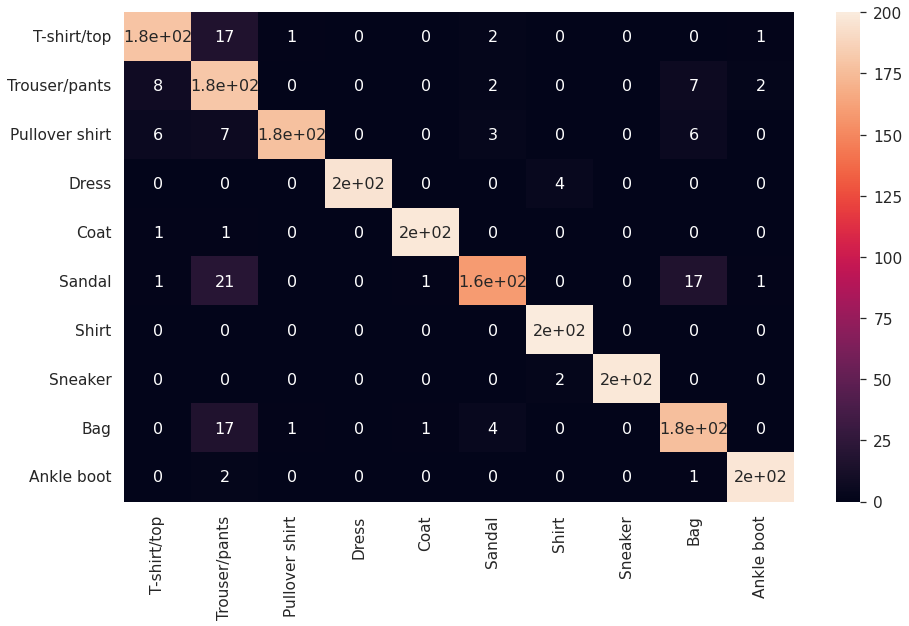

                precision    recall  f1-score   support

   T-shirt/top       0.92      0.90      0.91       200
 Trouser/pants       0.74      0.91      0.81       200
Pullover shirt       0.99      0.89      0.94       200
         Dress       1.00      0.98      0.99       200
          Coat       0.99      0.99      0.99       200
        Sandal       0.94      0.80      0.86       200
         Shirt       0.97      1.00      0.99       200
       Sneaker       1.00      0.99      0.99       200
           Bag       0.85      0.89      0.87       200
    Ankle Boot       0.98      0.98      0.98       200

     micro avg       0.93      0.93      0.93      2000
     macro avg       0.94      0.93      0.93      2000
  weighted avg       0.94      0.93      0.93      2000
   samples avg       0.93      0.93      0.93      2000

Runtime of the algorithm is  49.719  seconds


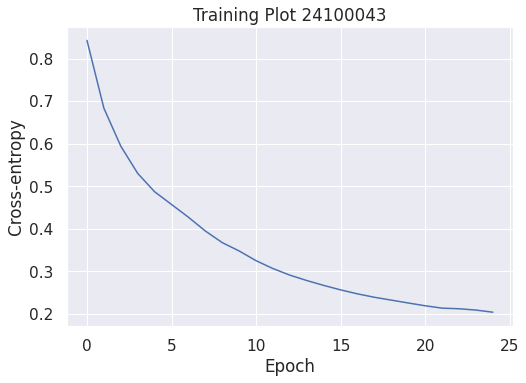

In [156]:
start = time.time()

nn = NeuralNetwork(input_size = INPUT_SIZE, hidden_nodes = HIDDEN_NODES, output_size = OUTPUT_SIZE)
history = nn.fit(x_train, y_train, epochs= EPOCHS, lr=LEARNING_RATE)
plt.plot(history);
plt.gca().set(xlabel='Epoch', ylabel='Cross-entropy', title='Training Plot {}'.format(rollnumber));
end = time.time()

print("Runtime of the algorithm is ", round((end - start),3)," seconds")

In [157]:
train_accuracy=nn.evaluate(x_train, y_train)
train_accuracy=train_accuracy[1]*100
print("training set accuracy: ", train_accuracy)

training set accuracy:  93.15


In [158]:
test_accuracy=nn.evaluate(x_test, y_test)
test_accuracy=test_accuracy[1]*100
print("test set accuracy: ",test_accuracy)

test set accuracy:  77.8125
